# Polytop Library Demonstration

This Jupyter notebook will demonstrate how to use the Polytop library to load sample ITP files, create monomer instances, and display a 2D representation of molecules.

## Importing the Library

We will import the `polytop` library and confirm the version.

In [1]:
# Load sample ITPs
import polytop
from polytop.monomer import Monomer 
from polytop.topology import Topology
from polytop.visualize import Visualize

print(f"Polytop Version {polytop.__version__}")

Polytop Version 0.1 alpha


## Loading Sample ITP Files

First, we will load the ITP files for some molecules to use as monomers.  We'll use some amino acids to make a polypeptide.  We'll start by importing `Arginine` using the `Topology.from_ITP()` function. This function will return a `Topology` object that contains all of the information from the ITP file.  Note for display purposes we'll add a double bond manually between the carbon and the second oxygen in the terminal carboxyl group.

In [2]:
arg = Topology.from_ITP('tests/samples/arginine.itp')

We can visualize the topology as a 2D structure using the Visualize class.

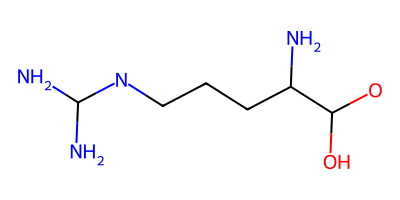

In [3]:
Visualize(arg).create_2D_image('README_files/arginine.png',(400,200))
from IPython.display import Image
Image(filename='README_files/arginine.png') 

NB: ITP topologies do not contain information about bond ordering.  We can manually fix up any bond.

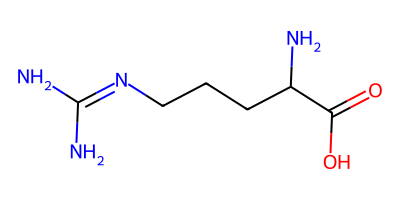

In [4]:
arg.get_bond('C11','O2').order = 2 # ITP files do not include bond orders
arg.get_bond('C12','N4').order = 2
Visualize(arg).create_2D_image('README_files/arginine.png',(400,200))
from IPython.display import Image
Image(filename='README_files/arginine.png')

We can also infer bond orders from expected atom valencies and available bonds.  This is done by the Visualize.infer_bond_orders() function.

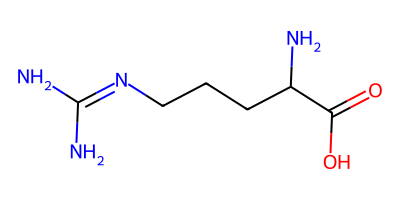

In [5]:
arg = Topology.from_ITP('tests/samples/arginine.itp')
Visualize(arg).infer_bond_orders().create_2D_image('README_files/arginine.png',(400,200))
from IPython.display import Image
Image(filename='README_files/arginine.png')

## Loading a glutamine topology

And we'll do the same with the second amino acid, glutamine

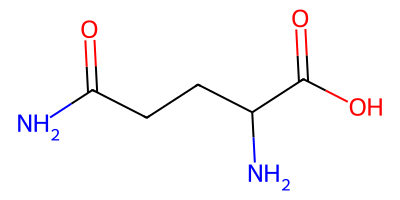

In [11]:
glu = Topology.from_ITP('tests/samples/glutamine.itp')
Visualize(glu).infer_bond_orders().create_2D_image('README_files/glutamine.png',(400,200))

from IPython.display import Image
Image(filename='README_files/glutamine.png')

# Convert a molecule topology to a monomer 

A monomer is an element that can participate in the formation of a polymer.  A monomer is defined by a topology and a set of polymerization junctions (defined by start and end bonds).  The monomer has 3 potential topologies, a start  unit, a link unit, and an end unit.  Which variant will be used will be determined by the position in the polymer the unit occupies.  The start unit is used for the first monomer in the polymer, the end unit is used for the last monomer in the polymer, and the link unit is used for all other monomers. 

In [7]:
arg = Topology.from_ITP('tests/samples/arginine.itp')
start = arg.get_bond('N3','H20')
end = arg.get_bond('C11','O1')
arg_monomer = Monomer(arg,start,end)
arg_monomer.save('tests/samples/arginine_monomer.json')

glu=Topology.from_ITP('tests/samples/glutamine.itp')
start = glu.get_bond('N1','H6')
end = glu.get_bond('C4','O1')
glu_monomer = Monomer(glu,start,end)
glu_monomer.save('tests/samples/glutamine_monomer.json')

Visualize(arg_monomer.topology).infer_bond_orders().create_2D_image('tests/samples/arginine.png',(400,200))
Visualize(arg_monomer.LHS).infer_bond_orders().create_2D_image('tests/samples/arginine_LHS.png',(400,200))
Visualize(arg_monomer.link).infer_bond_orders().create_2D_image('tests/samples/arginine_link.png',(400,200))
Visualize(arg_monomer.RHS).infer_bond_orders().create_2D_image('tests/samples/arginine_RHS.png',(400,200))

Visualize(glu_monomer.topology).infer_bond_orders().create_2D_image('tests/samples/glutamine.png',(400,200))
Visualize(glu_monomer.LHS).infer_bond_orders().create_2D_image('tests/samples/glutamine_LHS.png',(400,200))
Visualize(glu_monomer.link).infer_bond_orders().create_2D_image('tests/samples/glutamine_link.png',(400,200))
Visualize(glu_monomer.RHS).infer_bond_orders().create_2D_image('tests/samples/glutamine_RHS.png',(400,200))

from IPython.display import Image
from IPython.core.display import HTML
html = '<h1>Arginine</h1>'
html += f'<figure><img src="tests/samples/arginine.png" style="margin:0 10px" width="300"><figcaption>Arginine molecule</figcaption></figure>'

arginines = ['arginine_LHS.png','arginine_link.png', 'arginine_RHS.png']
html += '<div style="display:flex">'
for image in arginines:
    html += f'<div style="display:inline-flex"><figure><img src="tests/samples/{image}" style="margin:0 10px" width="300"><figcaption>{image}</figcaption></figure></div>'
html += '</div>'

html += '<h1>Glutamine</h1>'
html += f'<figure><img src="tests/samples/glutamine.png" style="margin:0 10px" width="300"><figcaption>Glutamine molecule</figcaption></figure>'

glutamines = ['glutamine_LHS.png','glutamine_link.png', 'glutamine_RHS.png']
html += '<div style="display:flex">'
for image in glutamines:
    html += f'<div style="display:inline-flex"><figure><img src="tests/samples/{image}" style="margin:0 10px" width="300"><figcaption>{image}</figcaption></figure></div>'
html += '</div>'

display(HTML(html))


# Convert monomers + distribution to a Polymer

Once you have multiple molecules configured as monomers you can then polymerize them.  The polymer will be extended with a specific number of monomer units (here 12), with a specific random uniform distribution (20% arginine / 80% glutamine), and optionally using a random seed (42) and optionally a specific start monomer and end monomer.  The polymer can be saved to a .json file 

In [8]:

from polytop.polymer import Polymer

arg = Topology.from_ITP('tests/samples/arginine.itp')
start = arg.get_bond('N3','H20')
end = arg.get_bond('C11','O1')
arg_monomer = Monomer(arg,start,end)

glu=Topology.from_ITP('tests/samples/glutamine.itp')
start = glu.get_bond('C4','O1')
end = glu.get_bond('N1','H6')
glu_monomer = Monomer(glu,start,end)

polymer = Polymer([arg_monomer,glu_monomer], [20,80], num_monomers= 12, seed= 42, start_monomer= arg_monomer)
polymer.save_to_file('tests/samples/polymer.json')
polymer_topology = polymer.get_topology()

Visualize(polymer_topology).infer_bond_orders().create_2D_image('tests/samples/polymer.png',(400,200))
from IPython.display import Image
Image(filename='README_files/polymer.png')

Exception: No virtual atoms in base topology

To convert this notebook to markdown, run the following command: 
    ```
    jupyter nbconvert README.ipynb --to markdown
    ```